# SISTEMAS DE DETECCION DE INTRUSIONES BASADO EN MODELOS DE INTELIGENCIA ARTIFICIAL EXPLICATIVA 
   
 Autor: Jose Hernandez Segura 
 Tutor: Xavier Larriva Novo 
 
 La idea de este proyecto es probar y comparar un total de 6 modelos de Machine Learning sobre el dataset CICIDS 2017 Dataset (https://www.unb.ca/cic/datasets/ids-2017.html): 
    
    
   - Support Vector Machine (SVM)
   - Decision Tree
   - Naive Bayes
   - K Means Clustering 
   - K Nearest Neighbours,
   - Random Forest
   
Primero de todo investigará y preparará el dataset, comprobando que no haya valores nulos y que todo sea correcto. A continuación se realizara una selección de las caracteristicas más importantes haciendo un filtrado. En ese punto todo estará listo para comenzar a entrenar los 6 modelos y extraer las pertinentes metricas. Finalmente se aplicará un explainer.
   

## Imports

In [1]:
# librerias requeridas para el proyecto, es posible que más abajo se incluya alguna librería extra
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import time
import shap 
import lime
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from sklearn.model_selection import train_test_split

## Descripción dataset

In [2]:
# path to where ML files are stored
path = 'MachineLearningCVE'
all_files = glob.glob(path + "/*.csv")

# concatenate the 8 files into 1
dataset = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
dataset

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

## Asignación de nombres a las columnas (Features)

In [5]:
# Assign the column names
dataset.columns = col_names
# Peak at first 5 records in the dataset
dataset.head(20)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.500000,17.677670,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
dataset.Label.value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

## Estudio de las caracteristicas y modificación de valores no validos

In [7]:
# get statistics about each feature
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination_Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow_Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total_Fwd_Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total_Backward_Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total_Length_of_Fwd_Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active_Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle_Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle_Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle_Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [8]:
# check all the values are numerical
# if not, would have to encode
dataset.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Backward_Packets           int64
Total_Length_of_Fwd_Packets      int64
                                ...   
Idle_Mean                      float64
Idle_Std                       float64
Idle_Max                         int64
Idle_Min                         int64
Label                           object
Length: 79, dtype: object

In [9]:
dataset['Flow_Bytes_s'] = dataset['Flow_Bytes_s'].astype('float64')
dataset['Flow_Packets_s'] = dataset['Flow_Packets_s'].astype('float64')
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

## Eliminación de valores nulos y de ataques no detectables

In [10]:
# check if there are any Null values
dataset.isnull().any().any()

True

In [12]:
# Replace Inf values with NaN
dataset = dataset.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
dataset = dataset.dropna()
# Double check these are all gone
dataset.isnull().any().any()

False

In [13]:
dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

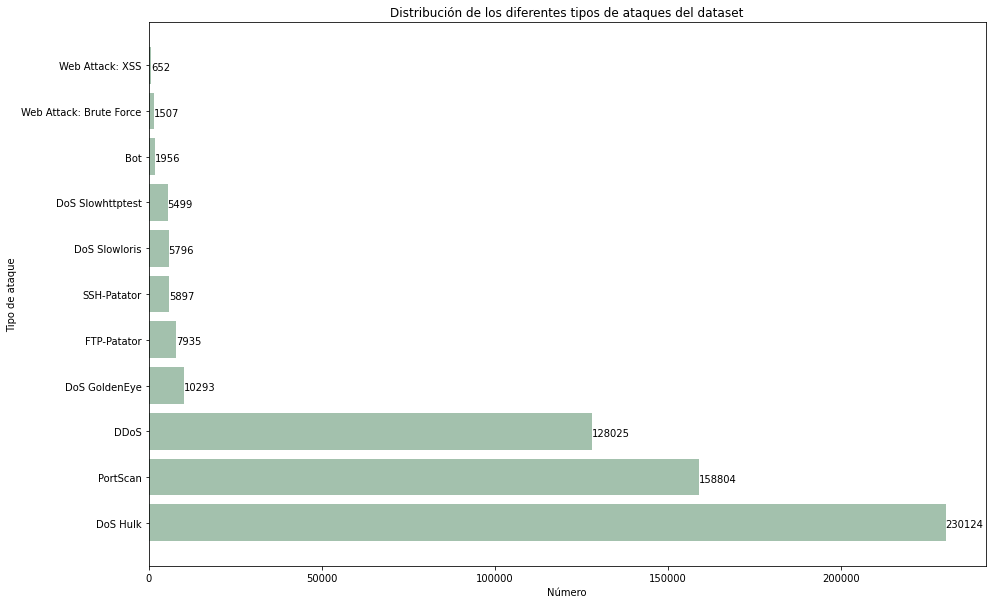

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(15,10))

attack = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris',
          'DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS')
y_pos = np.arange(len(attack)) 
amount = dataset['Label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribución de los diferentes tipos de ataques del dataset')
plt.xlabel('Número')
plt.ylabel('Tipo de ataque')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()
plt.savefig('distribution.pdf')

## Añadir columna de ataque para detección binaria

In [18]:
dataset['Attack'] = np.where(dataset['Label'] == 'BENIGN', 0, 1)

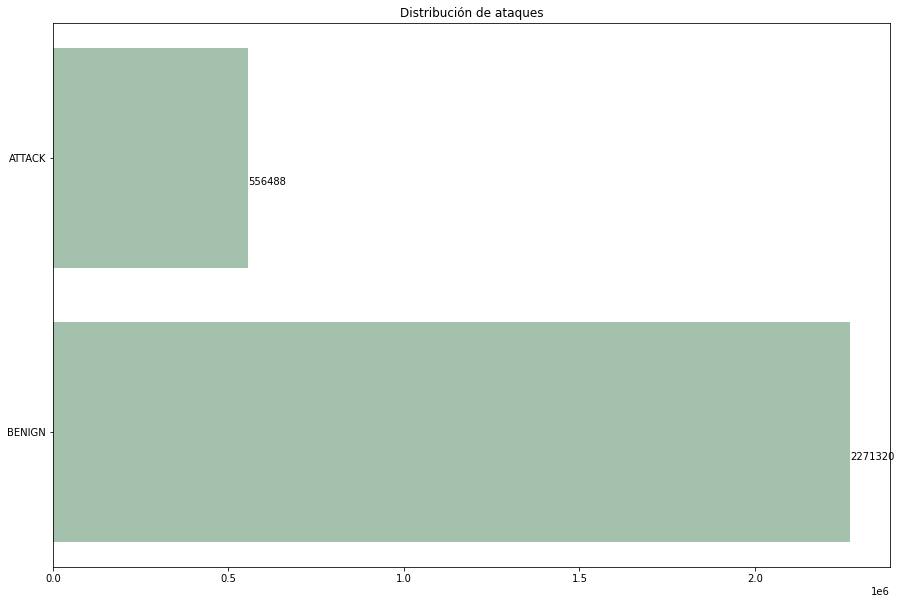

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(15,10))

attack = ('BENIGN','ATTACK')
y_pos = np.arange(len(attack)) 
amount = dataset['Attack'].value_counts()
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribución de ataques')

for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()
plt.savefig('distribution.pdf')

In [26]:
dataset.head(20)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack
0,54865,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,55054,109,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,55055,52,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,46236,34,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,54863,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
5,54871,1022,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
6,54925,4,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
7,54925,42,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
8,9282,4,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
9,55153,4,2,0,37,0,31,6,18.500000,17.677670,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


## Muestreo de datos

In [27]:
labelencoder = LabelEncoder()
dataset.iloc[:, -1] = labelencoder.fit_transform(dataset.iloc[:, -1])

In [28]:
dataset.Label.value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [29]:
# retain the minority class instances and sample the majority class instances
dataset_minor = dataset[(dataset['Label']=='Web Attack � XSS')|(dataset['Label']=='Web Attack � Brute Force')|(dataset['Label']=='Bot')|(dataset['Label']=='DoS Slowhttptest')|(dataset['Label']=='SSH-Patator')|(dataset['Label']=='DoS slowloris')|(dataset['Label']=='DoS GoldenEye')|(dataset['Label']=='FTP-Patator')]
dataset_major = dataset.drop(dataset_minor.index)

In [30]:
X = dataset_major.drop(['Label'],axis=1) 
y = dataset_major.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [31]:
# use k-means to cluster the data samples and select a proportion of data from each cluster
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=0).fit(X)

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4


In [32]:
klabel=kmeans.labels_
dataset_major['klabel']=klabel

In [33]:
dataset_major['klabel'].value_counts()

432    17943
665    15158
365    12364
154    11827
360    11159
       ...  
260       66
243       44
518       43
121       28
473       19
Name: klabel, Length: 997, dtype: int64

In [34]:
cols = list(dataset_major)
cols.insert(78, cols.pop(cols.index('Label')))
dataset_major = dataset_major.loc[:, cols]
dataset_major

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack,Label,klabel
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,454
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,167
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,616
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,968
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,173
692699,53,324,2,2,84,362,42,42,42.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,914
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,470
692701,53,1048635,6,2,192,256,32,32,32.0,0.00000,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,684


In [35]:
def typicalSampling(group):
    name = group.name
    frac = 0.008
    return group.sample(frac=frac)

result = dataset_major.groupby(
    'klabel', group_keys=False
).apply(typicalSampling)

In [36]:
result['Label'].value_counts()

BENIGN      16929
DoS Hulk     1803
PortScan     1229
DDoS          918
Name: Label, dtype: int64

In [37]:
result

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack,Label,klabel
61810,443,140374,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,0
31064,80,148213,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,0
11577,80,135641,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,0
10429,80,145378,2,0,12,0,6,6,6.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,0
630348,41494,128351,2,0,0,0,0,0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209483,53,47941,2,2,82,240,41,41,41.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,999
280519,53,49036,2,2,92,250,46,46,46.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,999
2012,53,48702,2,2,92,254,46,46,46.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,999
34567,53,49022,2,2,86,222,43,43,43.0,0.0,...,0.0,0,0,0.0,0.0,0,0,0,BENIGN,999


In [38]:
result = result.drop(['klabel'],axis=1)
result = result.append(dataset_minor)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [39]:
result

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack,Label
61810,443,140374,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,BENIGN
31064,80,148213,2,0,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,BENIGN
11577,80,135641,2,0,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,BENIGN
10429,80,145378,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,BENIGN
630348,41494,128351,2,0,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692606,80,11512204,8,5,326,11632,326,0,40.750000,115.258405,...,892.0,0.0,892,892,6507197.0,0.0,6507197,6507197,1,DoS GoldenEye
692613,80,11513325,5,5,471,3525,471,0,94.200000,210.637604,...,918.0,0.0,918,918,6508582.0,0.0,6508582,6508582,1,DoS GoldenEye
692652,80,11509201,7,6,314,11632,314,0,44.857143,118.680845,...,899.0,0.0,899,899,6503248.0,0.0,6503248,6503248,1,DoS GoldenEye
692681,80,11509095,8,5,369,11632,369,0,46.125000,130.461201,...,914.0,0.0,914,914,6504954.0,0.0,6504954,6504954,1,DoS GoldenEye


In [28]:
result.Label.value_counts()

BENIGN                      16938
DoS GoldenEye               10293
FTP-Patator                  7935
SSH-Patator                  5897
DoS slowloris                5796
DoS Slowhttptest             5499
Bot                          1956
DoS Hulk                     1796
Web Attack � Brute Force     1507
PortScan                     1233
DDoS                          912
Web Attack � XSS              652
Name: Label, dtype: int64

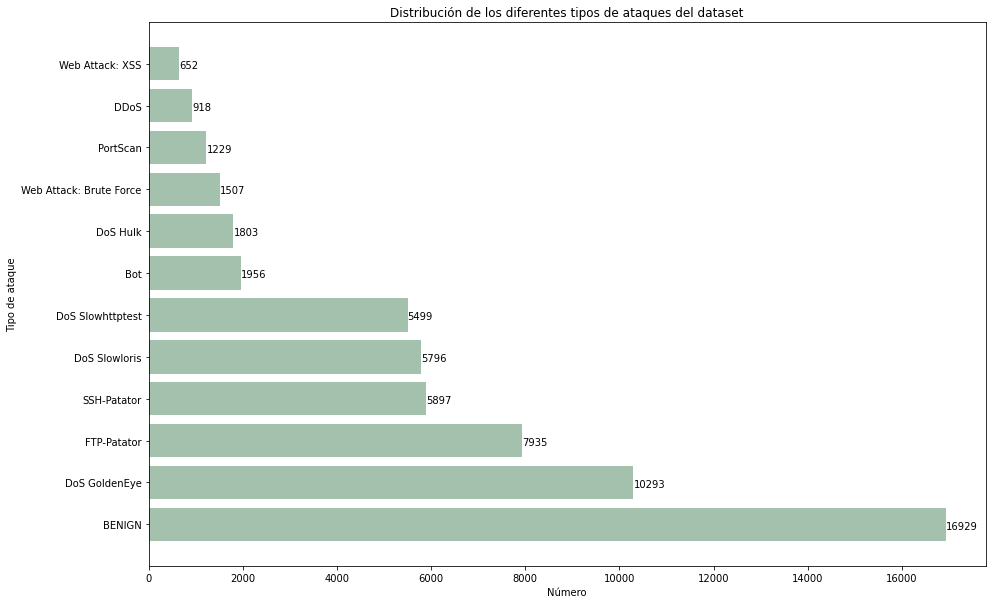

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(15,10))

attack = ('BENIGN','DoS GoldenEye','FTP-Patator', 'SSH-Patator', 'DoS Slowloris','DoS Slowhttptest', 'Bot','DoS Hulk','Web Attack: Brute Force', 'PortScan', 'DDoS',  
            'Web Attack: XSS')
y_pos = np.arange(len(attack)) 
amount = result['Label'].value_counts()
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribución de los diferentes tipos de ataques del dataset')
plt.xlabel('Número')
plt.ylabel('Tipo de ataque')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()
plt.savefig('distribution.pdf')

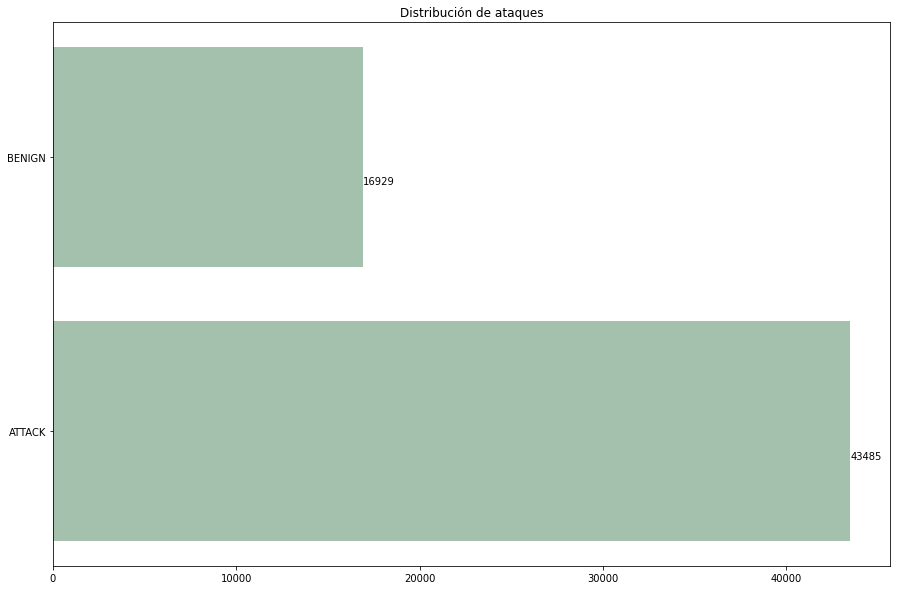

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(15,10))

attack = ('ATTACK','BENIGN')
y_pos = np.arange(len(attack)) 
amount = result['Attack'].value_counts()
plt.barh(y_pos, amount, align='center', color='#a3c1ad' )
plt.yticks(y_pos, attack)
plt.title('Distribución de ataques')

for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()
plt.savefig('distribution.pdf')

In [29]:
result.to_csv('./CICIDS2017_sampled.csv',index=0)